In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('/content/hotel_booking.csv')

In [ ]:
data['children'].fillna(data['children'].mean(), inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['agent'].fillna(0, inplace=True)


data.drop_duplicates(inplace=True)


data['children'] = data['children'].astype(int)
data['agent'] = data['agent'].astype('Int64')
data['company'] = data['company'].astype('Int64')


data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data = pd.get_dummies(data, columns=['hotel','meal','market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['total_guests'] = data['adults'] + data['children'] + data['babies']




numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_guests']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])



columns_to_drop=['reservation_status_date','reservation_status','arrival_date_month']
data=data.drop(columns=columns_to_drop)

print(data.head())

<ipython-input-54-4c51c432c145>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(data['children'].mean(), inplace=True)
<ipython-input-54-4c51c432c145>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

   is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0   2.227051          -1.634768                 -0.012141   
1            0   5.923385          -1.634768                 -0.012141   
2            0  -0.907814          -1.634768                 -0.012141   
3            0  -0.851667          -1.634768                 -0.012141   
4            0  -0.842309          -1.634768                 -0.012141   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                  -1.685297                 -0.92889             -1.310240   
1                  -1.685297                 -0.92889             -1.310240   
2                  -1.685297                 -0.92889             -0.786207   
3                  -1.685297                 -0.92889             -0.786207   
4                  -1.685297                 -0.92889             -0.262174   

     adults  children    babies  ... reserved_room_type_H  \
0  0.247897 -0.2606

In [ ]:
relevant_features = ['lead_time', 'total_nights', 'total_guests', 'adults', 'children',
                     'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes',
                     'deposit_type_Non Refund', 'deposit_type_Refundable', 'adr', 'required_car_parking_spaces', # Removed 'deposit_type_No Deposit'
                     'total_of_special_requests', 'days_in_waiting_list']


# Customer-related features
relevant_features.extend(['customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party'])

# Hotel and market segment features
relevant_features.extend(['hotel_Resort Hotel', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct',
                          'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA'])





selected_data = data[relevant_features + ['is_canceled']]
print(selected_data.head())




   lead_time  total_nights  total_guests    adults  children    babies  \
0   2.227051     -1.340370      0.043967  0.247897 -0.260659 -0.081579   
1   5.923385     -1.340370      0.043967  0.247897 -0.260659 -0.081579   
2  -0.907814     -0.949352     -1.340324 -1.478447 -0.260659 -0.081579   
3  -0.851667     -0.949352     -1.340324 -1.478447 -0.260659 -0.081579   
4  -0.842309     -0.558334      0.043967  0.247897 -0.260659 -0.081579   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0           -0.18156                -0.10318                       -0.091555   
1           -0.18156                -0.10318                       -0.091555   
2           -0.18156                -0.10318                       -0.091555   
3           -0.18156                -0.10318                       -0.091555   
4           -0.18156                -0.10318                       -0.091555   

   booking_changes  ...  customer_type_Transient  \
0         4.260101  ..

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,auc

In [ ]:
# Assuming 'selected_data' from the previous code is available
X = selected_data.drop('is_canceled', axis=1)
y = selected_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_random_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_cv.fit(X_train, y_train)
rf_best_model = rf_random_cv.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print(f"Random Forest best hyperparameters: {rf_random_cv.best_params_}")
print(f"Random Forest accuracy: {rf_accuracy}")
print(f"Random Forest precision: {rf_precision}")
print(f"Random Forest recall: {rf_recall}")
print(f"Random Forest F1 score: {rf_f1}")
print(f"Random Forest confusion matrix:\n{rf_confusion_matrix}")
print(f"Random Forest ROC AUC: {rf_roc_auc}")

Random Forest best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest accuracy: 0.851495100092135
Random Forest precision: 0.8635571639190457
Random Forest recall: 0.71820309887415
Random Forest F1 score: 0.7842015579357352
Random Forest confusion matrix:
[[13889  1018]
 [ 2528  6443]]
Random Forest ROC AUC: 0.8249565169020244


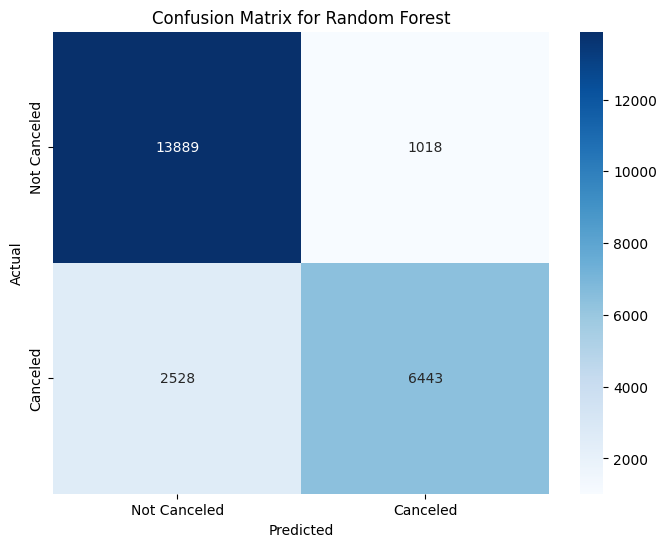

In [ ]:

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

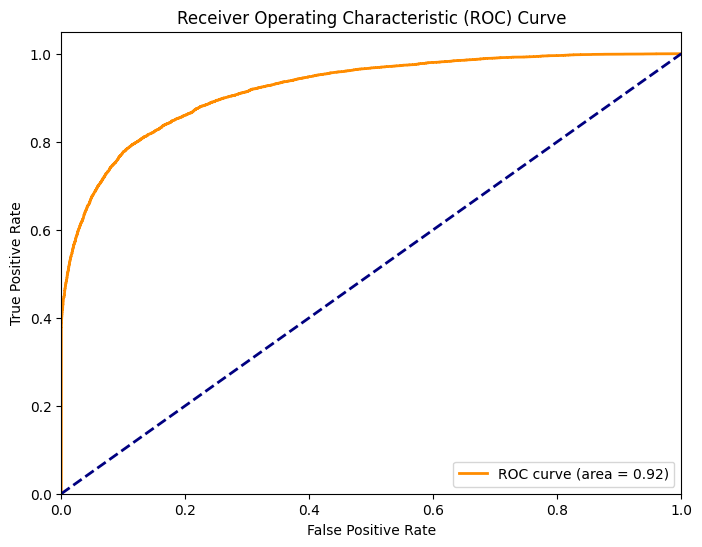

In [ ]:
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()